In [137]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/restaurant-business-rankings-2020/Top250.csv
/kaggle/input/restaurant-business-rankings-2020/Future50.csv
/kaggle/input/restaurant-business-rankings-2020/Independence100.csv


This business analysis will talk about the data of the potential restaurants of United States and we'll talk about their potential.

Let's start with installing our features

In [138]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [139]:
# Load the CSV File
potential_restaurants = pd.read_csv("../input/restaurant-business-rankings-2020/Future50.csv")

From the load of csv above, we get this table.

In [140]:
# Show the table
potential_restaurants.head()

,Rank,Restaurant,Location,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising
0,1,Evergreens,"Seattle, Wash.",24,130.5%,26,116.7%,1150,No
1,2,Clean Juice,"Charlotte, N.C.",44,121.9%,105,94.4%,560,Yes
2,3,Slapfish,"Huntington Beach, Calif.",21,81.0%,21,90.9%,1370,Yes
3,4,Clean Eatz,"Wilmington, N.C.",25,79.7%,46,58.6%,685,Yes
4,5,Pokeworks,"Irvine, Calif.",49,77.1%,50,56.3%,1210,Yes


- Restaurant: Name of the restaurant
- Location: Origin of the restaurant
- Sales: Systemwide Sales (Millions USD)
- YOY_Sales = Year-on-year sales increase in %
- Units = Number of Premises
- YOY_Units = year-on-year premises increase in %
- Unit_Volume = Average Unit Volume (Thousands USD)

In [141]:
# Check the table data type
potential_restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Rank         50 non-null     int64 
 1   Restaurant   50 non-null     object
 2   Location     50 non-null     object
 3   Sales        50 non-null     int64 
 4   YOY_Sales    50 non-null     object
 5   Units        50 non-null     int64 
 6   YOY_Units    50 non-null     object
 7   Unit_Volume  50 non-null     int64 
 8   Franchising  50 non-null     object
dtypes: int64(4), object(5)
memory usage: 3.6+ KB


From the info above we can see that all column has 50 rows and no null values between them, so we don't need to do a data cleaning

But, from the table, we can see that there are some integer value but with '%' sign and also a location value with ','. We need to fromat the integer into a real integer, separate the location column into the city and state column, and add more info at each column title about each value.

# Data Preparation

## Location

Start by separating the location column into 'City' and 'State

In [142]:
# Split the 'Name' column into two columns: 'First Name' and 'Last Name'
potential_restaurants[['City', 'State']] = potential_restaurants['Location'].str \
                                            .split(',', expand=True)

# Remove leading/trailing spaces if needed
potential_restaurants['City'] = potential_restaurants['City'].str.strip()
potential_restaurants['State'] = potential_restaurants['State'].str.strip()

# Drop the original column of 'Location'
potential_restaurants = potential_restaurants.drop(columns=['Location'])



## YOY Value

Continued by created an integer value at each YOY value

In [143]:
# Create new column that contains only the integer data of year-on-year sales & units
potential_restaurants['YOY_Sales (%)'] = potential_restaurants['YOY_Sales'] \
                                        .apply(lambda x: int(float(x.strip('%'))))
potential_restaurants['YOY_Units (%)'] = potential_restaurants['YOY_Units'] \
                                        .apply(lambda x: int(float(x.strip('%'))))

# Drop the original column of YOY_sales and YOY_units
potential_restaurants = potential_restaurants.drop(columns=['YOY_Sales', 'YOY_Units'])

## Column info

Add lastly, add some more info at column title for integer value

In [144]:
# Create a new 'Unit Volume' column and change into 'Million USD'
units_volume = (potential_restaurants['Unit_Volume'] / 1000).round(2)
potential_restaurants['Unit Volume (Million USD)'] = units_volume

# Drop the original 'Unit_Volume' columns
potential_restaurants = potential_restaurants.drop(columns=['Unit_Volume'])

# Rename the 'Sales' column into 'Sales (Million USD)'
potential_restaurants = potential_restaurants.rename(columns={'Sales': 'Sales (Million USD)'})

In [145]:
# Check the result
potential_restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rank                       50 non-null     int64  
 1   Restaurant                 50 non-null     object 
 2   Sales (Million USD)        50 non-null     int64  
 3   Units                      50 non-null     int64  
 4   Franchising                50 non-null     object 
 5   City                       50 non-null     object 
 6   State                      50 non-null     object 
 7   YOY_Sales (%)              50 non-null     int64  
 8   YOY_Units (%)              50 non-null     int64  
 9   Unit Volume (Million USD)  50 non-null     float64
dtypes: float64(1), int64(5), object(4)
memory usage: 4.0+ KB


# Column Analysis

## 1. Franchise

In [146]:
franchise = potential_restaurants['Franchising'].value_counts().index
count = potential_restaurants['Franchising'].value_counts()

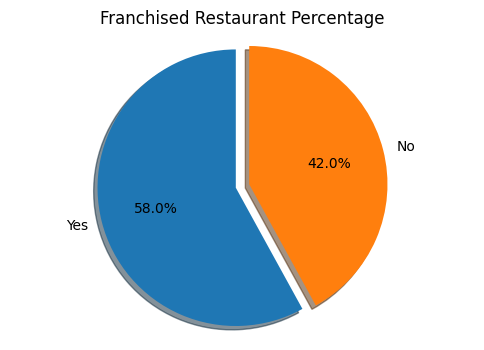

In [147]:
# Create the figure with size (6, 4)
plt.figure(figsize = (6, 4))

# Create the piechart
plt.pie(count, labels = franchise, explode = (0, 0.1), 
        autopct = '%.1f%%', shadow = True, startangle = 90)

# Create the title and axis
plt.title('Franchised Restaurant Percentage')
plt.axis('equal')

# Show the piechart
plt.show()

From the chart above we can see that 58% or 29 samples of the restaurant make it as a franchise, while 42% or 21 doesn't.

## 2. Unit

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


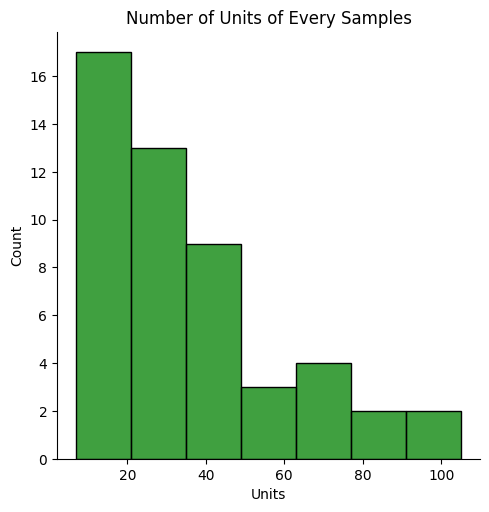

In [148]:
# Barchart to count units of every restaurant
sns.displot(potential_restaurants['Units'], color='green') \
            .set(title='Number of Units of Every Samples')

Barchart above is a barchart that contain the number of units does every restaurant have. You can see that more than 50% samples has less than 50 units, while only 11 samples has more than 50 unit restaurants

In [149]:
# Filter for restaurants where 'Franchising' is 'Yes' and 'No'
franchise_restaurants = potential_restaurants[potential_restaurants['Franchising'] == 'Yes']
no_franchise_restaurants = potential_restaurants[potential_restaurants['Franchising'] == 'No']

# Get the top 10 of non-franchise restaurants with the largest unit number
potential_units_yes = franchise_restaurants.nlargest(n=10, columns='Units') \
                                           .sort_values('Units', ascending=False)
potential_units_yes = potential_units_yes[['Restaurant', 'Units', 'Franchising']]

# Get the top 10 of non-franchise restaurants with the largest unit number
potential_units_no = no_franchise_restaurants.nlargest(n=10, columns='Units') \
                                             .sort_values('Units', ascending=False)
potential_units_no = potential_units_no[['Restaurant', 'Units', 'Franchising']]

# Display the results
print("Top 10 Franchise Restaurant with largest unit number:")
print(potential_units_yes)
print("")
print(" ")
print("--------------------------")
print("")
print("Top 10 Non-Franchise Restaurant with largest unit number:")
print(potential_units_no)

Top 10 Franchise Restaurant with largest unit number:
                 Restaurant  Units Franchising
1               Clean Juice    105         Yes
41           The Human Bean     97         Yes
21              Duck Donuts     90         Yes
17           Vitality Bowls     77         Yes
5               Playa Bowls     76         Yes
16  Ike's Love & Sandwiches     71         Yes
23          Joe & The Juice     69         Yes
12         Teriyaki Madness     63         Yes
8                Creamistry     60         Yes
4                 Pokeworks     50         Yes

 
--------------------------

Top 10 Non-Franchise Restaurant with largest unit number:
                    Restaurant  Units Franchising
13              Bluestone Lane     48          No
32  Jeni's Splendid Ice Creams     44          No
31                  Just Salad     38          No
26         Bibibop Asian Grill     37          No
46                      &pizza     35          No
0                   Evergreens     26   

From table above we can see that even restaurant with the highest number of unit, if they don't make it a franchise, they won't make it to the top 10 of restaurant with the most units

In [150]:
# Filter for 'Franchising' == 'Yes' and get the top 10 by 'Units'
potential_units_yes = potential_units_yes.nsmallest(n=10, columns='Units').sort_values('Units', ascending=False)
potential_units_yes = potential_units_yes[['Restaurant', 'Units', 'Franchising']]

# Display the results
print("Top 10 Franchise Restaurant with Smallest Unit Number")
print(potential_units_yes)

Top 10 Franchise Restaurant with Smallest Unit Number
                 Restaurant  Units Franchising
1               Clean Juice    105         Yes
41           The Human Bean     97         Yes
21              Duck Donuts     90         Yes
17           Vitality Bowls     77         Yes
5               Playa Bowls     76         Yes
16  Ike's Love & Sandwiches     71         Yes
23          Joe & The Juice     69         Yes
12         Teriyaki Madness     63         Yes
8                Creamistry     60         Yes
4                 Pokeworks     50         Yes


Meanwhile, if you make your restaurant a franchise, even restaurant with the smallest number still able to reach the top 10 of the largest restaurant units with no franchise

## 3. Location

In [151]:
potential_restaurants['Restaurant'].value_counts()

Restaurant
Evergreens                          1
Culinary Dropout                    1
Bubbakoo's Burritos                 1
Dos Toros Taqueria                  1
The Pizza Press                     1
The Lost Cajun                      1
Just Salad                          1
Jeni's Splendid Ice Creams          1
Boqueria                            1
Quickway Japanese Hibachi           1
Surcheros                           1
Famous Toastery                     1
Condado Tacos                       1
Clean Juice                         1
The Flying Biscuit Cafe             1
Blue Sushi Sake Grill               1
The Human Bean                      1
Spitz Mediterranean Street Food     1
Tacos 4 Life                        1
Pita Mediterranean Street Food      1
LA Crawfish                         1
&pizza                              1
Super Duper Burgers                 1
StoneFire Grill                     1
Bibibop Asian Grill                 1
Sugarfire Smokehouse                1
B

Since all of the restaurant only has 1 samples, that mean the location data is only the location of the base restaurant or the first unit of each restaurants. We don't have data of the location of each units of restaurants. So we can't assume the units location will help (or not helping) for the restaurant sale values. 

In [152]:
# Declare the value for the chart
tate = potential_restaurants['State'].value_counts().index
count = potential_restaurants['State'].value_counts()

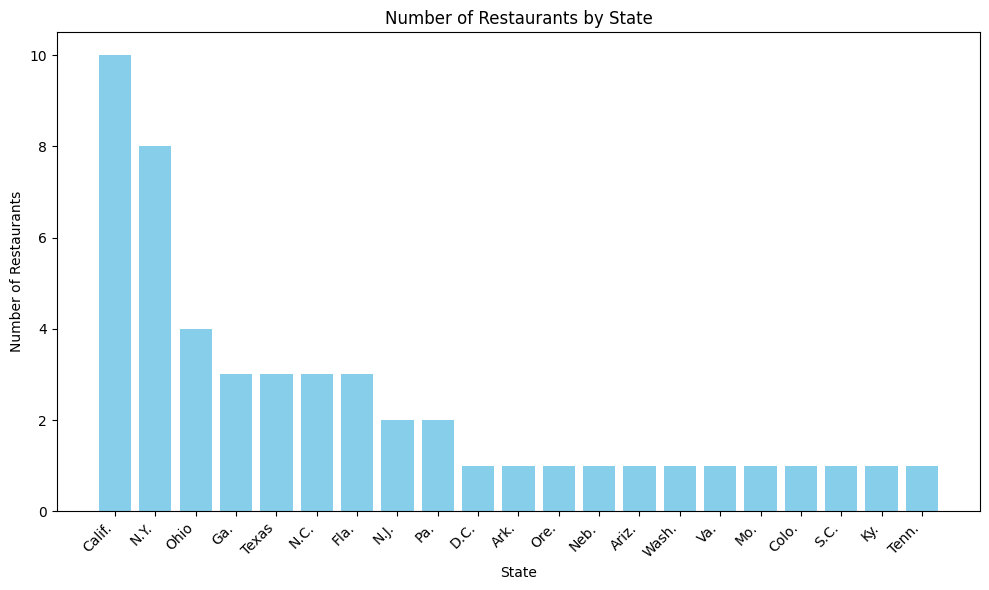

In [153]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(state, count, color='skyblue')

# Add labels and title
plt.xlabel('State')
plt.ylabel('Number of Restaurants')
plt.title('Number of Restaurants by State')

# Rotate the x labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

From the barchart above can see that only 2 states that has more than 5 potential restaurants. Those states are California and NY. While a lot of states (more than 50% of the states) only has 1 potential restaurant. Let's explore the franchise type.

In [154]:
# Filter for restaurants in California and New York
california_ny_restaurants = potential_restaurants[potential_restaurants['State'] \
                            .isin(['Calif.', 'N.Y.'])]

# Show the franchise status of these restaurants and sort by 'Franchising'
franchise_status = california_ny_restaurants[['Restaurant', 'State', 'Franchising']] \
                   .sort_values(by='Franchising',ascending=False)

# Display the result
print("Franchise Status of Restaurants in California & New York")
print(franchise_status)


Franchise Status of Restaurants in California & New York
                         Restaurant   State Franchising
2                          Slapfish  Calif.         Yes
16          Ike's Love & Sandwiches  Calif.         Yes
29                  The Pizza Press  Calif.         Yes
4                         Pokeworks  Calif.         Yes
17                   Vitality Bowls  Calif.         Yes
23                  Joe & The Juice    N.Y.         Yes
11                         Dog Haus  Calif.         Yes
8                        Creamistry  Calif.         Yes
7                         Melt Shop    N.Y.         Yes
13                   Bluestone Lane    N.Y.          No
22                  The Little Beet    N.Y.          No
24                         By Chloe    N.Y.          No
28               Dos Toros Taqueria    N.Y.          No
31                       Just Salad    N.Y.          No
33                         Boqueria    N.Y.          No
42  Spitz Mediterranean Street Food  Calif.    

From the table above we can see that 9 samples are a franchise and 9 other samples aren't a franchise. But it's interesting that 6 of franchise samples are located in California while 6 of non-franchise samples are located in New York. Let's see the states with only 1 potential restaurant.

In [155]:
# Filter for restaurants in California and New York
one_restaurants = potential_restaurants[potential_restaurants['State'] \
                  .isin(['D.C.', 'Ark.', 'Ore.', 'Neb.', 'Ariz.', 'Wash.',
                         'Va.', 'Mo.', 'Colo.', 'S.C.', 'Ky.', 'Tenn.'])]

# Show the franchise status of these restaurants and sort by 'Franchising'
franchise_status = one_restaurants[['Restaurant', 'State', 'Franchising']] \
                   .sort_values(by='Franchising',ascending=False)

# Display the result
print("Franchise Status of the Restaurant at the State Where There is Only 1 Potential Restaurant")
print(franchise_status)


Franchise Status of the Restaurant at the State Where There is Only 1 Potential Restaurant
                          Restaurant  State Franchising
10                     Eggs Up Grill   S.C.         Yes
12                  Teriyaki Madness  Colo.         Yes
34         Quickway Japanese Hibachi    Va.         Yes
41                    The Human Bean   Ore.         Yes
43                      Tacos 4 Life   Ark.         Yes
49  Gus's World Famous Fried Chicken  Tenn.         Yes
0                         Evergreens  Wash.          No
9               Joella's Hot Chicken    Ky.          No
25              Sugarfire Smokehouse    Mo.          No
37                  Culinary Dropout  Ariz.          No
40             Blue Sushi Sake Grill   Neb.          No
46                            &pizza   D.C.          No


The result was also 50% of samples are franchise restaurant and 50% of samples are non-franchise restaurant. So far, we can conclude that the restaurant location has no relation to the franchise status. But to make sure, we need to see the location of each state.

## 4. Sales

In [156]:
# Get the top 10 restaurants by sales and sort them in descending order
potential_sales_yes = franchise_restaurants.nlargest(n=10, columns='Sales (Million USD)') \
                                             .sort_values('Sales (Million USD)', ascending=False)

# Display the relevant columns
result = potential_sales_yes[['Restaurant', 'Sales (Million USD)', 'Franchising']]

# Display the result
print("Top 10 Franchise Restaurant with Highest Sales Value:")
print(result)

Top 10 Franchise Restaurant with Highest Sales Value:
                          Restaurant  Sales (Million USD) Franchising
4                          Pokeworks                   49         Yes
45                       LA Crawfish                   48         Yes
23                   Joe & The Juice                   47         Yes
41                    The Human Bean                   47         Yes
1                        Clean Juice                   44         Yes
16           Ike's Love & Sandwiches                   44         Yes
21                       Duck Donuts                   44         Yes
49  Gus's World Famous Fried Chicken                   44         Yes
12                  Teriyaki Madness                   41         Yes
36                   Famous Toastery                   40         Yes


In [157]:
# Get the top 10 restaurants by sales and sort them in descending order
potential_sales_no = no_franchise_restaurants.nlargest(n=10, columns='Sales (Million USD)') \
                                             .sort_values('Sales (Million USD)', ascending=False)

# Display the relevant columns
result = potential_sales_no[['Restaurant', 'Sales (Million USD)', 'Franchising']]

# Display the result
print("Top 10 Non-Franchise Restaurant with Highest Sales Value:")
print(result)

Top 10 Non-Franchise Restaurant with Highest Sales Value:
                    Restaurant  Sales (Million USD) Franchising
40       Blue Sushi Sake Grill                   49          No
13              Bluestone Lane                   48          No
46                      &pizza                   45          No
26         Bibibop Asian Grill                   44          No
31                  Just Salad                   42          No
32  Jeni's Splendid Ice Creams                   42          No
25        Sugarfire Smokehouse                   39          No
47         Super Duper Burgers                   39          No
38               Condado Tacos                   38          No
24                    By Chloe                   37          No


From both tables, we can see that franchise creates not much effect on sales number. Even though, we can see that only three non-franchise restaurant made it to the top 10, while there are 5 non-franchise restaurants at the bottom 10. So, we can conclude that the sales number of non-franchise restaurant is slightly lower than the franchise restaurant.

## 5. Unit Volume

In [158]:
# Get the top 10 restaurants by sales and sort them in descending order
potential_volume_yes = franchise_restaurants.nlargest(n=10, columns='Unit Volume (Million USD)') \
                                             .sort_values('Unit Volume (Million USD)', ascending=False)

# Display the relevant columns
result = potential_volume_yes[['Restaurant', 'Unit Volume (Million USD)', 'Franchising']]

# Display the result
print("Top 10 Franchise Restaurant with Highest Unit Volume:")
print(result)

Top 10 Franchise Restaurant with Highest Unit Volume:
                          Restaurant  Unit Volume (Million USD) Franchising
45                       LA Crawfish                       2.05         Yes
43                      Tacos 4 Life                       1.62         Yes
49  Gus's World Famous Fried Chicken                       1.60         Yes
36                   Famous Toastery                       1.54         Yes
39           The Flying Biscuit Cafe                       1.51         Yes
2                           Slapfish                       1.37         Yes
7                          Melt Shop                       1.26         Yes
19          Maple Street Biscuit Co.                       1.26         Yes
44    Pita Mediterranean Street Food                       1.26         Yes
35                         Surcheros                       1.23         Yes


In [159]:
# Get the top 10 restaurants by sales and sort them in descending order
potential_volume_no = no_franchise_restaurants.nlargest(n=10, columns='Unit Volume (Million USD)') \
                                             .sort_values('Unit Volume (Million USD)', ascending=False)

# Display the relevant columns
result = potential_volume_no[['Restaurant', 'Unit Volume (Million USD)', 'Franchising']]

# Display the result
print("Top 10 Non-Franchise Restaurant with Highest Unit Volume:")
print(result)

Top 10 Non-Franchise Restaurant with Highest Unit Volume:
                         Restaurant  Unit Volume (Million USD) Franchising
20                  Bulla Gastrobar                       4.30          No
33                         Boqueria                       4.26          No
18        Hawkers Asian Street Fare                       3.80          No
40            Blue Sushi Sake Grill                       3.50          No
37                 Culinary Dropout                       3.12          No
25             Sugarfire Smokehouse                       2.82          No
24                         By Chloe                       2.80          No
38                    Condado Tacos                       2.76          No
42  Spitz Mediterranean Street Food                       2.70          No
47              Super Duper Burgers                       2.63          No


## 6. Year-on-Year Analysis

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


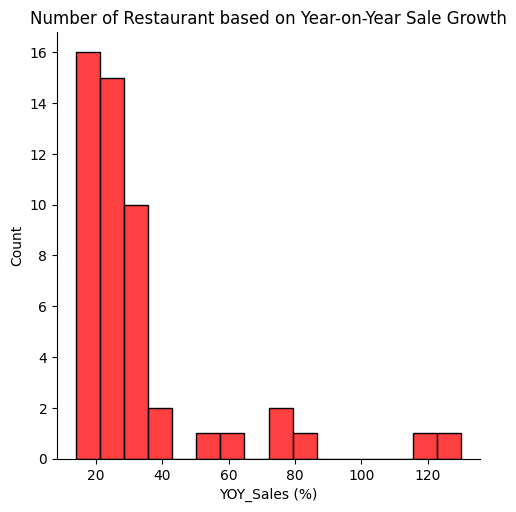

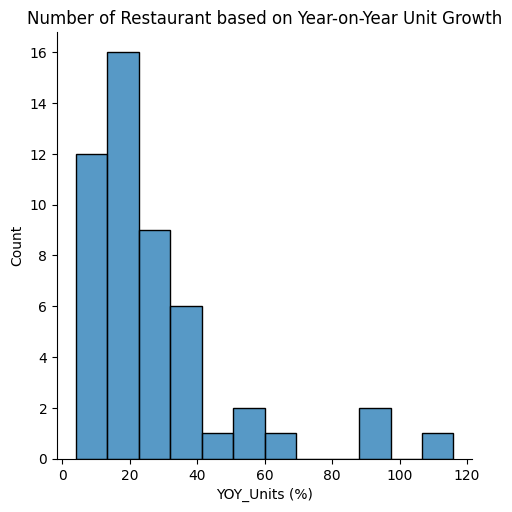

In [160]:
# Create the barchart for Year-on-year Sale Growth
sns.displot(potential_restaurants['YOY_Sales (%)'], color='Red') \
            .set(title='Number of Restaurant based on Year-on-Year Sale Growth')

# Create the barchart for Year-on-year Unit Growth
sns.displot(potential_restaurants['YOY_Units (%)']) \
            .set(title='Number of Restaurant based on Year-on-Year Unit Growth')

From the graph we can see that most of the YOY Sales and YOY Units percentage of every sample are below 50%. Even only 4 restaurants has YOY sales above 100% and only 2 has YOY units above 75% 

In [161]:
# Get the top 10 franchise restaurants by year-on-year sales and sort them in descending order
potential_growth_sales_yes = franchise_restaurants.nlargest(n = 10, columns = 'YOY_Sales (%)') \
                                                  .sort_values('YOY_Sales (%)', ascending = False)

# Display the relevant columns
result = potential_growth_sales_yes[['Restaurant', 'Sales (Million USD)', 'YOY_Sales (%)', 
                                     'Franchising']]

# Display the result
print("Top 10 Franchise Restaurant with Highest Year-on-Year Sale Growth")
print(" ")
print(result)

Top 10 Franchise Restaurant with Highest Year-on-Year Sale Growth
 
          Restaurant  Sales (Million USD)  YOY_Sales (%) Franchising
1        Clean Juice                   44            121         Yes
2           Slapfish                   21             81         Yes
3         Clean Eatz                   25             79         Yes
4          Pokeworks                   49             77         Yes
5        Playa Bowls                   39             62         Yes
6   The Simple Greek                   24             52         Yes
7          Melt Shop                   20             39         Yes
8         Creamistry                   24             36         Yes
10     Eggs Up Grill                   30             35         Yes
11          Dog Haus                   39             34         Yes


In [162]:
# Get the top 10 non-franchise restaurants by year-on-year sales and sort them in descending order
potential_growth_sales_no = no_franchise_restaurants.nlargest(n = 10, columns = 'YOY_Sales (%)') \
                                                    .sort_values('YOY_Sales (%)', 
                                                                 ascending = False)

# Display the relevant columns
result = potential_growth_sales_no[['Restaurant', 'Sales (Million USD)', 'YOY_Sales (%)', 
                                    'Franchising']]

# Display the result
print("Top 10 Non-Franchise Restaurant with Highest Year-on-Year Sale Growth")
print(" ")
print(result)

Top 10 Non-Franchise Restaurant with Highest Year-on-Year Sale Growth
 
                   Restaurant  Sales (Million USD)  YOY_Sales (%) Franchising
0                  Evergreens                   24            130          No
9        Joella's Hot Chicken                   29             35          No
13             Bluestone Lane                   48             33          No
14          Original ChopShop                   21             32          No
18  Hawkers Asian Street Fare                   22             30          No
20            Bulla Gastrobar                   32             28          No
22            The Little Beet                   23             26          No
24                   By Chloe                   37             25          No
25       Sugarfire Smokehouse                   39             25          No
26        Bibibop Asian Grill                   44             24          No


In [163]:
# Get the top 10 franchise restaurants by year-on-year units and sort them in descending order
potential_growth_units_yes = franchise_restaurants.nlargest(n = 10, columns = 'YOY_Units (%)') \
                                                  .sort_values('YOY_Units (%)', 
                                                               ascending = False)

# Display the relevant columns
result = potential_growth_units_yes[['Restaurant', 'Units', 'YOY_Units (%)', 'Franchising']]

# Display the result
print("Top 10 Franchise Restaurant with Highest Year-on-Year Unit Growth")
print(" ")
print(result)

Top 10 Franchise Restaurant with Highest Year-on-Year Unit Growth
 
           Restaurant  Units  YOY_Units (%) Franchising
1         Clean Juice    105             94         Yes
2            Slapfish     21             90         Yes
12   Teriyaki Madness     63             65         Yes
3          Clean Eatz     46             58         Yes
4           Pokeworks     50             56         Yes
11           Dog Haus     50             42         Yes
10      Eggs Up Grill     41             36         Yes
7           Melt Shop     19             35         Yes
6    The Simple Greek     36             33         Yes
15  Rapid Fired Pizza     35             29         Yes


In [164]:
# Get the top 10 non-franchise restaurants by year-on-year sales 
# Sort them in descending order
potential_growth_units_no = no_franchise_restaurants.nlargest(n = 10, columns = 'YOY_Units (%)') \
                                                    .sort_values('YOY_Units (%)', 
                                                                 ascending = False)

# Display the relevant columns
result = potential_growth_units_no[['Restaurant', 'Units', 'YOY_Units (%)', 'Franchising']]

# Display the result
print("Top 10 Franchise Restaurant with Highest Year-on-Year Unit Growth")
print(" ")
print(result)

Top 10 Franchise Restaurant with Highest Year-on-Year Unit Growth
 
                    Restaurant  Units  YOY_Units (%) Franchising
0                   Evergreens     26            116          No
18   Hawkers Asian Street Fare      7             40          No
13              Bluestone Lane     48             37          No
22             The Little Beet     12             33          No
9         Joella's Hot Chicken     17             30          No
31                  Just Salad     38             26          No
26         Bibibop Asian Grill     37             23          No
32  Jeni's Splendid Ice Creams     44             22          No
14           Original ChopShop     12             20          No
33                    Boqueria      7             16          No


# Restaurant Prediction

## Predicting Restaurant With the Most Units Next Year

In [165]:
# Figure out the average price by dividing total sales and total meals served
units_next_year = (((potential_restaurants['YOY_Units (%)'] / 100) * potential_restaurants['Units']) + potential_restaurants['Units']).round()
potential_restaurants['Predicted Units Next Year'] = units_next_year
potential_restaurants.sort_values(by='Predicted Units Next Year', ascending=False).head(10)

,Rank,Restaurant,Sales (Million USD),Units,Franchising,City,State,YOY_Sales (%),YOY_Units (%),Unit Volume (Million USD),Predicted Units Next Year
1,2,Clean Juice,44,105,Yes,Charlotte,N.C.,121,94,0.56,204.0
41,42,The Human Bean,47,97,Yes,Medford,Ore.,19,19,0.54,115.0
21,22,Duck Donuts,44,90,Yes,Mechanicsburg,Pa.,28,16,0.53,104.0
12,13,Teriyaki Madness,41,63,Yes,Denver,Colo.,34,65,0.89,104.0
5,6,Playa Bowls,39,76,Yes,Belmar,N.J.,62,28,0.58,97.0
17,18,Vitality Bowls,37,77,Yes,San Ramon,Calif.,30,24,0.54,95.0
16,17,Ike's Love & Sandwiches,44,71,Yes,San Francisco,Calif.,30,29,0.70,92.0
23,24,Joe & The Juice,47,69,Yes,New York,N.Y.,25,25,0.76,86.0
4,5,Pokeworks,49,50,Yes,Irvine,Calif.,77,56,1.21,78.0
8,9,Creamistry,24,60,Yes,Yorba Linda,Calif.,36,27,0.46,76.0


From the y-o-y units growth comparison, we can see that at the top 10, franchise restaurants gained more percentage. That's because based on the system, franchise system is easier to gain new units.

## Predicting Restaurant with the Most Sales Next Year

In [166]:
# Figure out the average price by dividing total sales and total meals served
sales_next_year = (((potential_restaurants['YOY_Sales (%)'] / 100) * potential_restaurants['Sales (Million USD)']) + potential_restaurants['Sales (Million USD)']).round(2)
potential_restaurants['Predicted Sales Next Year (Million USD)'] = sales_next_year
potential_restaurants.sort_values(by='Predicted Sales Next Year (Million USD)', ascending=False).head(10)

,Rank,Restaurant,Sales (Million USD),Units,Franchising,City,State,YOY_Sales (%),YOY_Units (%),Unit Volume (Million USD),Predicted Units Next Year,Predicted Sales Next Year (Million USD)
1,2,Clean Juice,44,105,Yes,Charlotte,N.C.,121,94,0.56,204.0,97.24
4,5,Pokeworks,49,50,Yes,Irvine,Calif.,77,56,1.21,78.0,86.73
13,14,Bluestone Lane,48,48,No,New York,N.Y.,33,37,1.18,66.0,63.84
5,6,Playa Bowls,39,76,Yes,Belmar,N.J.,62,28,0.58,97.0,63.18
23,24,Joe & The Juice,47,69,Yes,New York,N.Y.,25,25,0.76,86.0,58.75
40,41,Blue Sushi Sake Grill,49,14,No,Omaha,Neb.,19,16,3.50,16.0,58.31
16,17,Ike's Love & Sandwiches,44,71,Yes,San Francisco,Calif.,30,29,0.70,92.0,57.20
21,22,Duck Donuts,44,90,Yes,Mechanicsburg,Pa.,28,16,0.53,104.0,56.32
45,46,LA Crawfish,48,25,Yes,McAllen,Texas,17,13,2.05,28.0,56.16
41,42,The Human Bean,47,97,Yes,Medford,Ore.,19,19,0.54,115.0,55.93


That easier way resulted the above table. We can see that from the 10 restaurant on the list, 8 of them are franchise restaurants. That mean franchise restaurant has more potential value of being big restaurant, if they can maintain their performance next year.

## Predicting Restaurant With the Highest Unit Volume Next Year

In [167]:
# Figure out the average price by dividing total sales and total meals served
volume_rate_next_year = (potential_restaurants['Predicted Sales Next Year (Million USD)'] / potential_restaurants['Predicted Units Next Year']).round(2)
potential_restaurants['Predicted Unit Volume Next Year'] = volume_rate_next_year
potential_restaurants.sort_values(by='Predicted Unit Volume Next Year', ascending=False).head(10)

,Rank,Restaurant,Sales (Million USD),Units,Franchising,City,State,YOY_Sales (%),YOY_Units (%),Unit Volume (Million USD),Predicted Units Next Year,Predicted Sales Next Year (Million USD),Predicted Unit Volume Next Year
20,21,Bulla Gastrobar,32,8,No,Doral,Fla.,28,14,4.30,9.0,40.96,4.55
33,34,Boqueria,27,7,No,New York,N.Y.,22,16,4.26,8.0,32.94,4.12
40,41,Blue Sushi Sake Grill,49,14,No,Omaha,Neb.,19,16,3.50,16.0,58.31,3.64
24,25,By Chloe,37,14,No,New York,N.Y.,25,7,2.80,15.0,46.25,3.08
37,38,Culinary Dropout,20,7,No,Scottsdale,Ariz.,20,16,3.12,8.0,24.00,3.00
25,26,Sugarfire Smokehouse,39,15,No,Olivette,Mo.,25,15,2.82,17.0,48.75,2.87
18,19,Hawkers Asian Street Fare,22,7,No,Orlando,Fla.,30,40,3.80,10.0,28.60,2.86
42,43,Spitz Mediterranean Street Food,28,11,No,Los Angeles,Calif.,18,10,2.70,12.0,33.04,2.75
38,39,Condado Tacos,38,15,No,Columbus,Ohio,19,15,2.76,17.0,45.22,2.66
48,49,StoneFire Grill,31,13,No,Agoura Hills,Calif.,16,8,2.55,14.0,35.96,2.57


But the good news is, non-franchise restaurant still has bigger unit volume. So, even though they still have lower sale value, they can maintain their unit quality, but then change their type into a franchise restaurant, to gain sales